In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2

In [2]:
PATH = "C:\\Users\\anura\\Downloads\\archive1\\kagglecatsanddogs_3367a\\PetImages"

In [22]:
def loadFolderImages(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                images.append(img)
        except:
            None
    return images

In [23]:
cats = PATH+"\\cat"
dogs = PATH+"\\dog"

In [24]:
cats = loadFolderImages(cats)
dogs = loadFolderImages(dogs)

In [26]:
def resize_images(imgs):
    resized_images = []
    for img in imgs:
        resized_img = cv2.resize(img, (100, 100))  
        resized_images.append(resized_img)
    return resized_images

# Resize normal and tumor images
cats = resize_images(cats)
dogs = resize_images(dogs)

In [27]:
cats = np.array(cats)
dogs = np.array(dogs)

# Normalize images
cats = cats / 255.0
dogs = dogs / 255.0

In [28]:
from sklearn.model_selection import train_test_split

# Create labels for the images: 0 for normal, 1 for tumor
cats_labels = np.zeros(cats.shape[0])
dogs_labels = np.ones(dogs.shape[0])

# Concatenate normal and tumor images and labels
X = np.concatenate((cats, dogs), axis=0)
y = np.concatenate((cats_labels, dogs_labels), axis=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(19930, 100, 100, 3)

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=20,     # Range (0-180) within which to randomly rotate pictures
    width_shift_range=0.2, # Fraction of total width to randomly translate images
    height_shift_range=0.2,# Fraction of total height to randomly translate images
    zoom_range=0.2,        # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=True)    # Randomly flip inputs vertically

# Fit the ImageDataGenerator object to your data
datagen.fit(X_train)

In [41]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, validation_data = (X_test, y_test) , epochs=70)

Epoch 1/70
622/622 [==============================] - 120s 191ms/step - loss: 0.6713 - accuracy: 0.5839 - val_loss: 0.6059 - val_accuracy: 0.6633
Epoch 2/70
622/622 [==============================] - 112s 180ms/step - loss: 0.6251 - accuracy: 0.6515 - val_loss: 0.5953 - val_accuracy: 0.6761
Epoch 3/70
622/622 [==============================] - 113s 181ms/step - loss: 0.5980 - accuracy: 0.6801 - val_loss: 0.5596 - val_accuracy: 0.7062
Epoch 4/70
622/622 [==============================] - 113s 181ms/step - loss: 0.5702 - accuracy: 0.7022 - val_loss: 0.5104 - val_accuracy: 0.7489
Epoch 5/70
622/622 [==============================] - 112s 180ms/step - loss: 0.5629 - accuracy: 0.7072 - val_loss: 0.5533 - val_accuracy: 0.7118
Epoch 6/70
622/622 [==============================] - 112s 180ms/step - loss: 0.5540 - accuracy: 0.7141 - val_loss: 0.5158 - val_accuracy: 0.7405
Epoch 7/70
622/622 [==============================] - 113s 181ms/step - loss: 0.5437 - accuracy: 0.7241 - val_loss: 0.4980 -

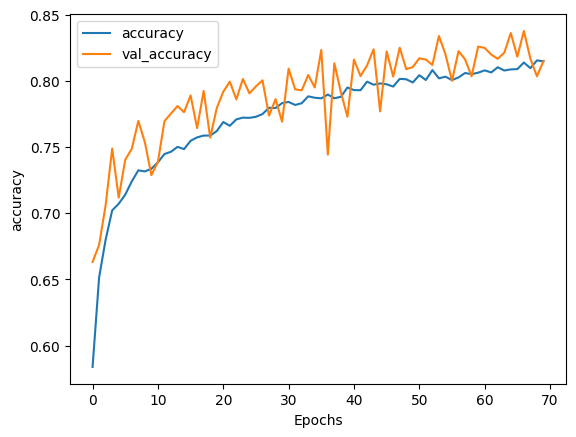

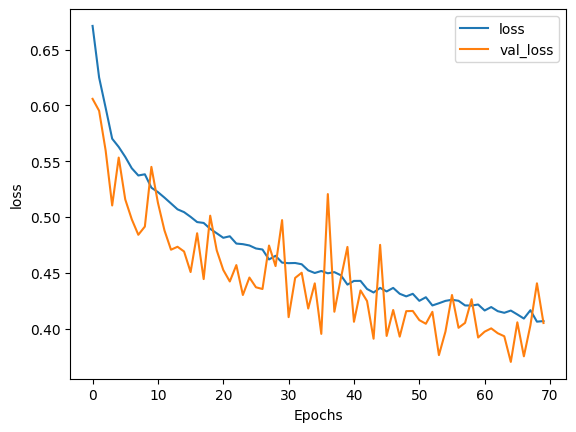

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [44]:
history.history

{'loss': [0.6712878942489624,
  0.625081479549408,
  0.597957193851471,
  0.5702255368232727,
  0.5628573894500732,
  0.5539525747299194,
  0.5437415242195129,
  0.5372926592826843,
  0.538342297077179,
  0.5263676047325134,
  0.5223897695541382,
  0.5174602270126343,
  0.5122269988059998,
  0.5069594383239746,
  0.5044423341751099,
  0.5002263784408569,
  0.4955459237098694,
  0.4947657585144043,
  0.48949354887008667,
  0.4854944944381714,
  0.4814566373825073,
  0.48281264305114746,
  0.4762793779373169,
  0.4757487177848816,
  0.47457385063171387,
  0.47187793254852295,
  0.4709508717060089,
  0.4620410203933716,
  0.4653211534023285,
  0.4592086970806122,
  0.45872339606285095,
  0.4588722288608551,
  0.4577373266220093,
  0.45224854350090027,
  0.4499155879020691,
  0.45170193910598755,
  0.44965216517448425,
  0.4506928026676178,
  0.44787073135375977,
  0.4395034909248352,
  0.4428165555000305,
  0.4428533911705017,
  0.43559420108795166,
  0.4324374198913574,
  0.4365539252758

In [45]:
# model.save("CatVsDog100x100.h5")

C:\Users\anura\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
P_test = "C:\\Users\\anura\\Downloads\\tmp\\"

In [75]:
test_model = loadFolderImages(P_test)
test_model = resize_images(test_model)
test_model = np.array(test_model)/255.0


In [76]:
a = model.predict(test_model)

1/1 [==============================] - 0s 25ms/step


In [77]:
a

array([[0.1538569 ],
       [0.85821295],
       [0.06315608],
       [0.9070987 ],
       [0.12703128],
       [0.54638714],
       [0.5695344 ],
       [0.29506585],
       [0.22304828],
       [0.24445263],
       [0.05548212],
       [0.01724935],
       [0.07049972],
       [0.1710646 ],
       [0.18875845],
       [0.616134  ],
       [0.2850669 ],
       [0.9923219 ],
       [0.74666667]], dtype=float32)

In [74]:
test_model.shape

(8, 100, 100, 3)